IMPORT PACKAGES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv(r'E:\Forecast-commuters-inflow-for-Airline-Industry-using-Prophet-main\forecast commuters\Dataset\air_passengers.csv')
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
data['ds']=pd.to_datetime(data['ds'],format='%Y-%M')

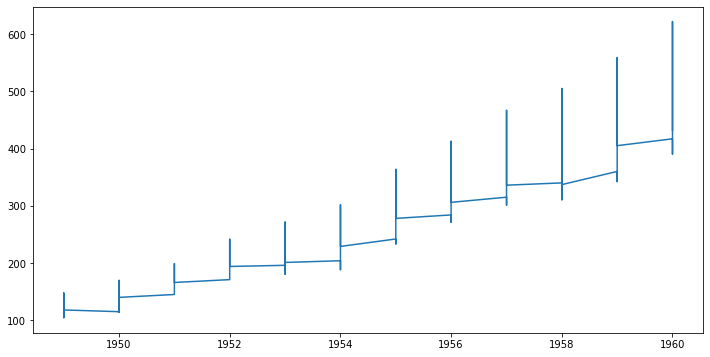

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

FIT THE MODEL

In [18]:
from fbprophet.forecaster import Prophet

In [19]:
model=Prophet()

In [20]:
model.fit(data)

MAKING FUTURE PREDICTIONS

In [21]:
future_prediction=model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()
forecast=model.predict(future_prediction)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01 00:01:00,110.626523,50.249089,158.960310,110.626523,110.626523,-6.326153,-6.326153,-6.326153,-0.612572,...,8.139139,8.139139,8.139139,-13.852720,-13.852720,-13.852720,0.0,0.0,0.0,104.300370
1,1949-01-01 00:02:00,110.626579,47.129039,166.265535,110.626579,110.626579,-4.330121,-4.330121,-4.330121,1.370378,...,8.149044,8.149044,8.149044,-13.849543,-13.849543,-13.849543,0.0,0.0,0.0,106.296458
2,1949-01-01 00:03:00,110.626636,55.806623,161.880623,110.626636,110.626636,-2.334823,-2.334823,-2.334823,3.352606,...,8.158936,8.158936,8.158936,-13.846366,-13.846366,-13.846366,0.0,0.0,0.0,108.291813
3,1949-01-01 00:04:00,110.626693,50.984641,163.906842,110.626693,110.626693,-0.340705,-0.340705,-0.340705,5.333669,...,8.168816,8.168816,8.168816,-13.843189,-13.843189,-13.843189,0.0,0.0,0.0,110.285988
4,1949-01-01 00:05:00,110.626750,56.289707,171.894536,110.626750,110.626750,1.651789,1.651789,1.651789,7.313120,...,8.178682,8.178682,8.178682,-13.840012,-13.840012,-13.840012,0.0,0.0,0.0,112.278539


In [22]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

                   ds        yhat  yhat_lower  yhat_upper
0 1949-01-01 00:01:00  104.300370   50.249089  158.960310
1 1949-01-01 00:02:00  106.296458   47.129039  166.265535
2 1949-01-01 00:03:00  108.291813   55.806623  161.880623
3 1949-01-01 00:04:00  110.285988   50.984641  163.906842
4 1949-01-01 00:05:00  112.278539   56.289707  171.894536


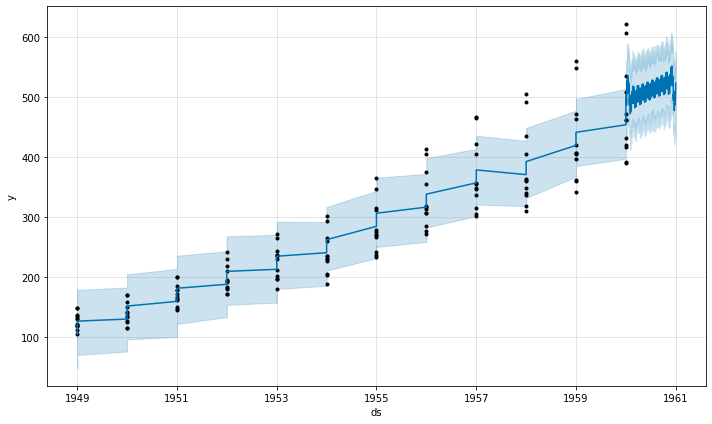

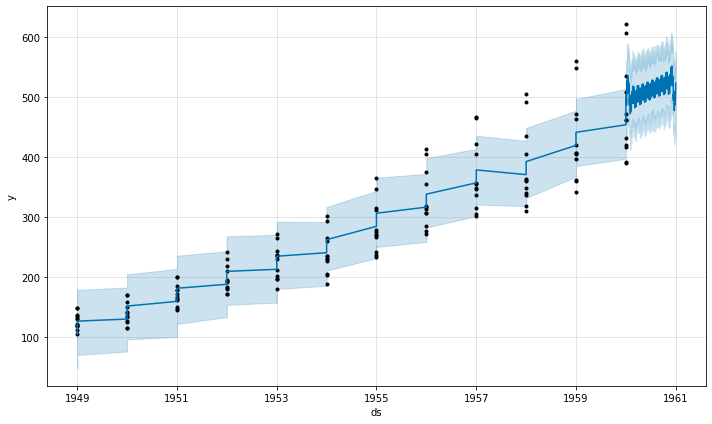

In [23]:
model.plot(forecast)

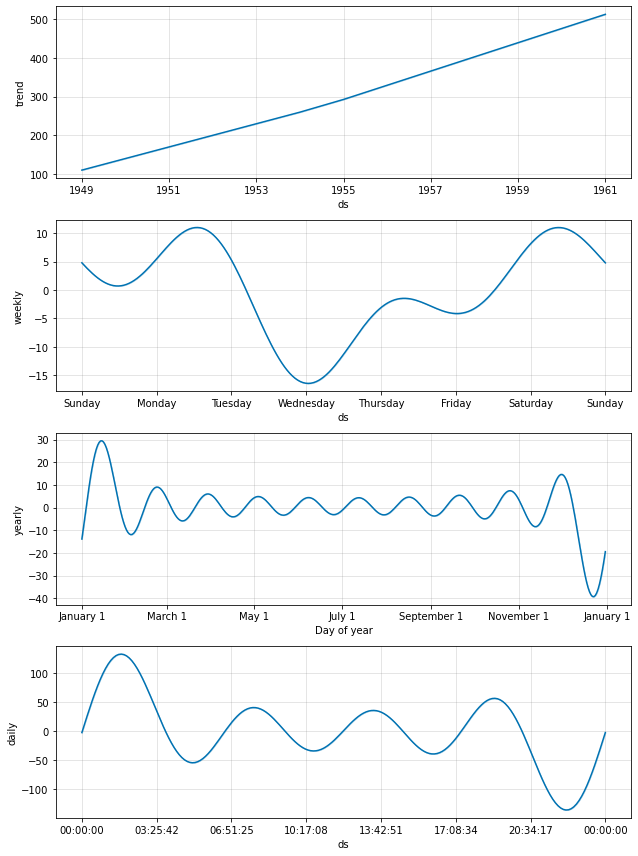

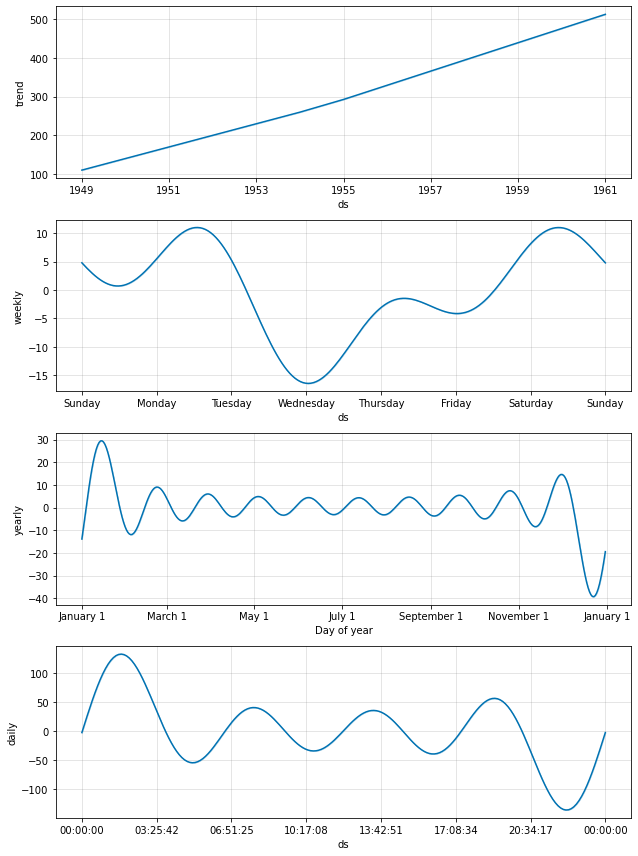

In [24]:
model.plot_components(forecast)

In [25]:
from fbprophet.diagnostics import cross_validation

In [26]:
cv=cross_validation(model,initial='530 days',period='180 days',horizon='365 days')
cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 1950-08-16 00:12:00 and 1959-01-01 00:12:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-01-01 00:01:00,880.978193,865.937117,896.122780,145,1950-08-16 00:12:00
1,1951-01-01 00:02:00,887.592627,872.394902,903.975279,150,1950-08-16 00:12:00
2,1951-01-01 00:03:00,893.020723,878.012649,908.913201,178,1950-08-16 00:12:00
3,1951-01-01 00:04:00,897.261044,882.273610,913.493666,163,1950-08-16 00:12:00
4,1951-01-01 00:05:00,900.312471,883.813057,916.207153,172,1950-08-16 00:12:00
...,...,...,...,...,...,...
211,1960-01-01 00:08:00,426.426893,376.107938,478.209798,606,1959-01-01 00:12:00
212,1960-01-01 00:09:00,428.754629,375.806399,480.510895,508,1959-01-01 00:12:00
213,1960-01-01 00:10:00,431.076742,380.512126,482.368531,461,1959-01-01 00:12:00
214,1960-01-01 00:11:00,433.392713,381.097950,483.472777,390,1959-01-01 00:12:00


EVALUATION OF THE MODEL

In [27]:
from fbprophet.diagnostics import performance_metrics

In [28]:
pm=performance_metrics(cv)
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,142 days 23:57:00,701892.852949,837.790459,829.068266,4.562237,4.504669,0.000000
1,142 days 23:58:00,722153.096580,849.795915,840.851551,4.565719,4.504669,0.000000
2,142 days 23:59:00,743629.731203,862.339684,853.229190,4.607732,4.504669,0.000000
3,143 days 00:00:00,763990.886177,874.065722,865.320441,4.654282,4.541479,0.000000
4,148 days 23:49:00,775839.934182,880.817764,872.625931,4.655438,4.541479,0.000000
...,...,...,...,...,...,...,...
191,364 days 23:56:00,7390.788185,85.969693,61.326515,0.123516,0.111409,0.523810
192,364 days 23:57:00,7490.462073,86.547456,62.018936,0.121801,0.111409,0.523810
193,364 days 23:58:00,7486.124713,86.522394,61.948216,0.120738,0.111409,0.523810
194,364 days 23:59:00,7452.357668,86.327039,61.590153,0.118947,0.111263,0.571429
